In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model


In [2]:
os.chdir('U:\\ProjectDataset')

In [3]:
tar=pd.read_excel('survival_LUSC.xlsx')

In [4]:
dt=pd.read_excel('PCA_LUSC_L.xlsx')

In [5]:
dt=dt.set_index(dt.columns[0])

In [9]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split

In [57]:
Y=tar

In [58]:
#split the data to 70/30 percentage 
X_train,X_test,Y_train,Y_test=train_test_split(dt,Y,test_size=0.3,random_state=42)
print(X_train.shape,Y_train.shape)           
print(X_test.shape,Y_test.shape)

(350, 19) (350, 1)
(151, 19) (151, 1)


In [121]:
lasso=Lasso(alpha=0.001).fit(dt,tar)

In [122]:
lasso.score(dt,tar)

0.6652732909807473

In [123]:
lasso_coef=lasso.coef_
print(lasso_coef)

[-2.40040566e-02  7.05267400e-02  3.79602457e-02  6.21007497e-02
 -1.60415565e-03  3.63231110e-02  1.88103807e-02 -8.61201619e-02
 -5.48280945e-02 -2.90887734e-01  8.99699801e+00  1.01546550e+00
  2.81696426e-02 -2.90101979e+00  5.97165415e-05  1.54124725e+01
  6.89227928e+00  2.61539018e-01 -6.53022873e-01]


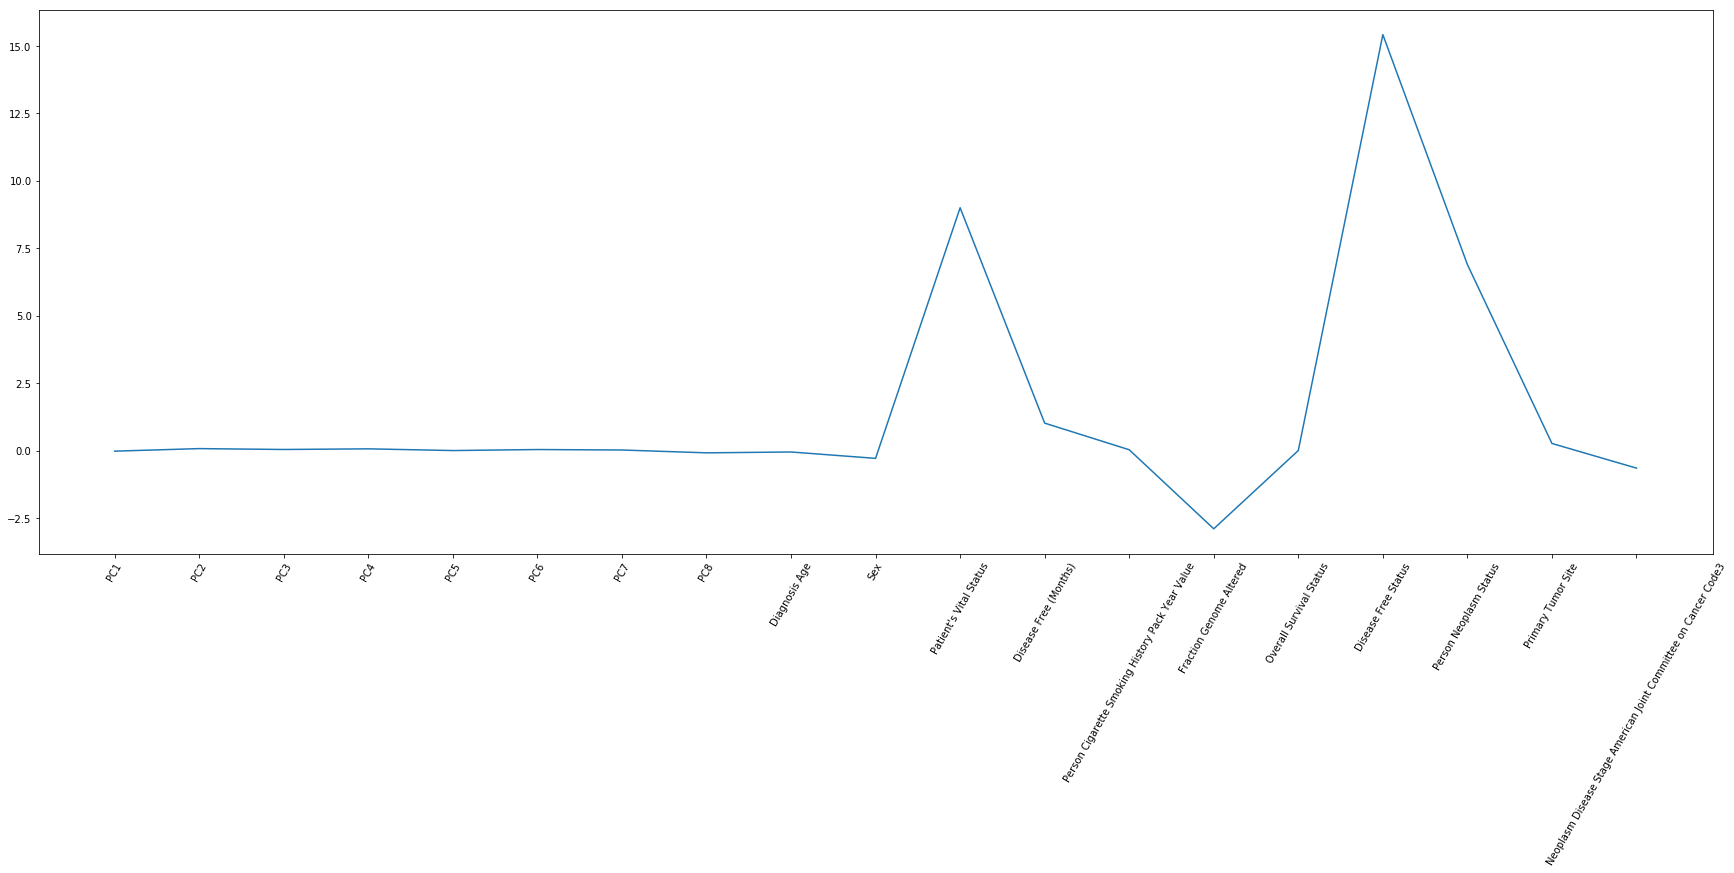

In [126]:
plt.figure(figsize=(30,10))
plt.plot(range(len(dt.columns)),lasso_coef)
plt.xticks(range(len(dt.columns)),dt.columns.values,rotation=60)
plt.show() 

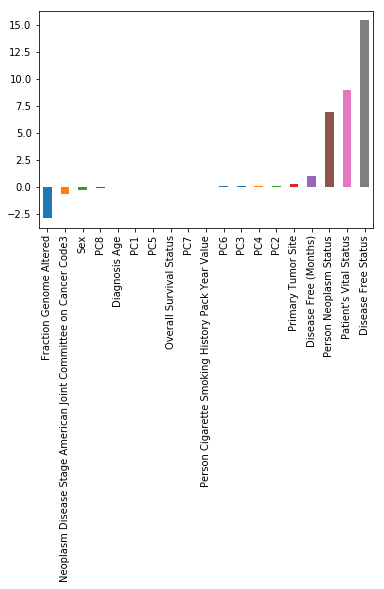

In [127]:
from pandas import Series
predictors=dt.columns
coef=Series(lasso_coef,predictors).sort_values()
coef.plot(kind='bar')


In [128]:
lasso.score(dt,tar)

0.6652732909807473

In [129]:
predictions=lasso.predict(X_test)

In [130]:
predictions[0:5]

array([62.7292219 , 39.59132429, 18.78191008, 80.92460812, 37.00124953])

In [131]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(Y_test,predictions)

In [132]:
mse

557.6780801541726